In [1]:
## Conv MNIST Dataset to Bin File

In [2]:
bin_location = r"C:\Users\Baron\Documents\Grad_School\EE_278\Projects\EE278_term_project\mnist_bin"

In [28]:
import os
import cv2
import numpy as np

import shutil

def preprocess_image(image_path, output_dir):
    try:
        # Dynamically create the .bin file name
        output_name = os.path.splitext(os.path.basename(image_path))[0] + ".bin"
        output_path = os.path.join(output_dir, output_name)

        # Ensure the output directory exists
        os.makedirs(output_dir, exist_ok=True)

        # Load the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f"Error: Could not load image from '{image_path}'. Ensure it is a valid file.")

        # Resize the image to 32x32
        img_resized = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)

        # Normalize pixel values to [0, 1]
        img_normalized = img_resized / 255.0

        # Flatten the image to a 1D array
        img_flattened = img_normalized.flatten()

        # Write the binary file
        with open(output_path, 'wb') as bin_file:
            img_flattened.astype('float32').tofile(bin_file)

        print(f"Preprocessed image saved to '{output_path}'.")

    except Exception as e:
        print(f"Error during preprocessing: {e}")

In [29]:
os.environ["PATH_EE278"] = "C:/Users/Baron/Desktop/EE_278_Repo/EE_278/"


In [30]:
# Example usage
num_location = r"C:\Users\Baron\Desktop\EE_278_Repo\EE_278\%PATH_EE278%\EE278_env\pictures\img_0.jpg"
bin_location = r"C:/Users/Baron/Desktop/EE_278_Repo/EE_278/%PATH_EE278%/EE278_env/bin_files"

preprocess_image(num_location, bin_location)

Preprocessed image saved to 'C:/Users/Baron/Desktop/EE_278_Repo/EE_278/%PATH_EE278%/EE278_env/bin_files\img_0.bin'.


In [35]:
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt

def read_and_display_binary_image(bin_path, shape=(32, 32)):
    """
    Reads a binary file, reshapes it into an image, and displays it using matplotlib.
    
    Parameters:
        bin_path (str): Path to the binary file to be read.
        shape (tuple): Shape to reshape the flat array into (default: (32, 32)).
    
    Returns:
        np.ndarray: The reshaped array containing the image data.
    """
    try:
        # Check if the file exists
        if not os.path.exists(bin_path):
            raise FileNotFoundError(f"Error: The file '{bin_path}' does not exist.")

        # Read the binary file into a NumPy array
        data = np.fromfile(bin_path, dtype='float32')

        # Check if the data can be reshaped to the specified shape
        if data.size != np.prod(shape):
            raise ValueError(f"Error: Data size {data.size} does not match the expected shape {shape}.")

        # Reshape the data to the specified shape
        image = data.reshape(shape)
        
        # Display the image using matplotlib
        plt.imshow(image, cmap='gray')
        plt.title("Binary Image")
        plt.colorbar()  # Optional: show pixel intensity scale
        plt.show()

        print(f"Binary image from '{bin_path}' successfully displayed.")
        return image

    except Exception as e:
        print(f"Error reading or displaying binary file: {e}")
        return None

In [44]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_278_Repo\\EE_278\\%PATH_EE278%\\EE278_env'

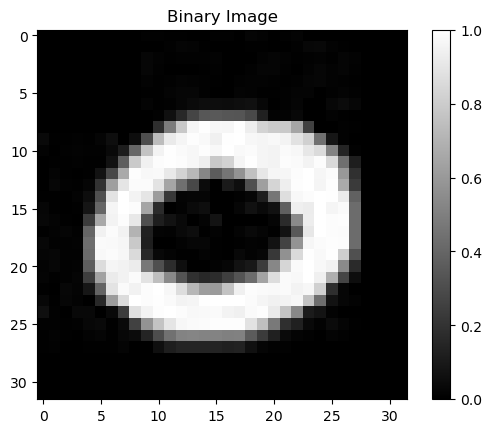

Binary image from 'bin_files/img_0.bin' successfully displayed.
Image Array:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
# Path to the binary file
bin_path = 'bin_files/img_0.bin'

# Read the binary file and reshape it to (32, 32)
image_array = read_and_display_binary_image(bin_path, shape=(32, 32))

# Check the content if successfully read
if image_array is not None:
    print("Image Array:")
    print(image_array)

In [49]:
import os
import numpy as np
from tensorflow.keras import models, layers, datasets

# Create directories for saving weights and biases
def create_output_dirs(output_dir):
    os.makedirs(output_dir, exist_ok=True)

# Save weights and biases as .bin files
def save_weights_as_bin(model, output_dir):
    # Layer mapping
    layer_map = {
        "conv1": 0,  # First Conv2D layer
        "conv2": 2,  # Second Conv2D layer
        "fc1": 5,    # First Dense layer
        "fc2": 6,    # Second Dense layer
        "fc3": 7     # Output Dense layer
    }

    # Save Conv1 weights and biases
    conv1_weights, conv1_bias = model.layers[layer_map["conv1"]].get_weights()
    conv1_weights.flatten().astype('float32').tofile(os.path.join(output_dir, "conv1_filters.bin"))
    conv1_bias.flatten().astype('float32').tofile(os.path.join(output_dir, "conv1_bias.bin"))

    # Save Conv2 weights and biases
    conv2_weights, conv2_bias = model.layers[layer_map["conv2"]].get_weights()
    conv2_weights.flatten().astype('float32').tofile(os.path.join(output_dir, "conv2_filters.bin"))
    conv2_bias.flatten().astype('float32').tofile(os.path.join(output_dir, "conv2_bias.bin"))

    # Save Fully Connected (fc1) weights and biases
    fc1_weights, fc1_bias = model.layers[layer_map["fc1"]].get_weights()
    fc1_weights.flatten().astype('float32').tofile(os.path.join(output_dir, "fc1_weights.bin"))
    fc1_bias.flatten().astype('float32').tofile(os.path.join(output_dir, "fc1_bias.bin"))

    # Save Fully Connected (fc2) weights and biases
    fc2_weights, fc2_bias = model.layers[layer_map["fc2"]].get_weights()
    fc2_weights.flatten().astype('float32').tofile(os.path.join(output_dir, "fc2_weights.bin"))
    fc2_bias.flatten().astype('float32').tofile(os.path.join(output_dir, "fc2_bias.bin"))

    # Save Fully Connected (fc3) weights and biases
    fc3_weights, fc3_bias = model.layers[layer_map["fc3"]].get_weights()
    fc3_weights.flatten().astype('float32').tofile(os.path.join(output_dir, "fc3_weights.bin"))
    fc3_bias.flatten().astype('float32').tofile(os.path.join(output_dir, "fc3_bias.bin"))

    print("All weights and biases saved as .bin files.")

# Preprocess the MNIST dataset
def preprocess_mnist():
     # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

    # Normalize pixel values to [0, 1]
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Resize each image to 32x32 using cv2
    x_train_resized = np.array([cv2.resize(img, (32, 32)) for img in x_train])
    x_test_resized = np.array([cv2.resize(img, (32, 32)) for img in x_test])

    # Add a channel dimension (32x32x1)
    x_train = x_train_resized.reshape(-1, 32, 32, 1)
    x_test = x_test_resized.reshape(-1, 32, 32, 1)

    return x_train, y_train, x_test, y_test

# Build the LeNet model
def build_lenet():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=5, activation='relu', input_shape=(32, 32, 1)),
        layers.MaxPool2D(pool_size=2),
        layers.Conv2D(16, kernel_size=5, activation='relu'),
        layers.MaxPool2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax'),
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model and save weights
def train_and_save():
    # Preprocess data
    x_train, y_train, x_test, y_test = preprocess_mnist()

    # Build the LeNet model
    model = build_lenet()

    # Train the model
    model.fit(x_train, y_train, epochs=5, batch_size=64)

    # Evaluate the model (optional)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    # Save the weights and biases as .bin files
    output_dir = "bin_files/"
    create_output_dirs(output_dir)
    save_weights_as_bin(model, output_dir)

# Run the training and save the weights
train_and_save()

C:\Users\Baron\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8472 - loss: 0.5052
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9750 - loss: 0.0776
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9828 - loss: 0.0539
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9873 - loss: 0.0412
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9895 - loss: 0.0345
313/313 - 1s - 2ms/step - accuracy: 0.9832 - loss: 0.0564
Test Loss: 0.05643640086054802, Test Accuracy: 0.9832000136375427
All weights and biases saved as .bin files.


In [51]:
import numpy as np
import cv2
from tensorflow.keras import models

def test_model(model, image_path):
    """
    Tests the trained model on a single image.
    
    Parameters:
        model (tensorflow.keras.Model): The trained model.
        image_path (str): Path to the test image.
    
    Returns:
        int: Predicted class label.
    """
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Error: Could not load image from '{image_path}'. Ensure the path is correct.")

    # Resize the image to 32x32
    img_resized = cv2.resize(img, (32, 32))

    # Normalize pixel values to [0, 1]
    img_normalized = img_resized / 255.0

    # Add batch and channel dimensions (1, 32, 32, 1)
    img_input = img_normalized.reshape(1, 32, 32, 1)

    # Make a prediction
    predictions = model.predict(img_input)
    predicted_class = np.argmax(predictions, axis=1)[0]

    print(f"Predicted class: {predicted_class}")
    return predicted_class

# Example usage
# Rebuild and reload the model if needed
model = build_lenet()  # Use the function from the previous code
model.load_weights('lenet_weights.hdf5')  # Load the trained weights (if saved earlier)

# Path to the test image (e.g., from MNIST or your own dataset)
test_image_path = "pictures/img_0.jpg"  # Replace with your image path

# Test the model
predicted_class = test_model(model, test_image_path)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'lenet_weights.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)